In [3]:
# Importing necessary libraries

# Natural Language Toolkit (NLTK) for text processing
import nltk
from nltk.corpus import stopwords  # For accessing stopwords (common words to be filtered out)

# Suppressing warnings to keep the notebook clean
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and analysis
import pandas as pd  # For dataframes and data manipulation
import numpy as np   # For numerical operations and array handling

# Statistical analysis
from scipy.stats import pearsonr  # For calculating Pearson correlation coefficient

# Data visualization
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns
from wordcloud import WordCloud  # For generating word clouds from text data

# Machine learning utilities
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

# Collections for counting and handling data structures
from collections import Counter  # For counting occurrences of elements in a list

# Download stopwords corpus for later use
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thiag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Checking the integrity of the dataset.

Analysis of Possible Duplicate Rows
The dataset contains 1,462,063 potentially duplicate rows out of a total of 2,463,419 rows, meaning approximately 59% of the data could be duplicates. These rows are considered potential duplicates because their topic, review, and score are identical to another row.

Hypothesis
We hypothesize that the length of a review influences its likelihood of being duplicated. Specifically, shorter reviews, which often use generic or simple phrases, are more likely to be repeated. In contrast, longer and more detailed reviews tend to have unique content and are less likely to appear multiple times.

For example:

"good": This review appears 6,488 times in the dataset, demonstrating how shorter, generic reviews are more likely to be repeated.
"His first great sprawling record it gets us into the rhythm and magic sexuality of Prince. It is before the majestic Purple Rain but there are glorious party-up-and-down songs like Little Red Corvette, Delirious, and the hijinks of Lady Cab Driver DMSR. The title track is the icing on one great dance rocker of an album and makes you forget every sensitive rock/pop offering when you are listening. This is the ultimate whambam thank you madam!": This highly specific review does not have any repetitions in the dataset.
Statistical Validation
To test the relationship between review length (word count) and duplication frequency, we calculated the Pearson correlation coefficient and the corresponding p-value:

Pearson correlation: -0.01
P-value: 0.000
The correlation of -0.01 suggests a very weak negative relationship between review length and duplication frequency. Although the p-value indicates statistical significance (p < 0.05), the effect size is negligible. This implies that while shorter reviews are somewhat more likely to be repeated, the overall relationship is not strong enough to draw definitive conclusions based solely on word count.

Observed Patterns
A scatterplot of review length (word count) versus repetition count provides additional insight. It shows that extremely short reviews (e.g., one or two words) are more likely to be repeated, while longer reviews rarely have duplicates. Despite the weak overall correlation, this pattern aligns intuitively with expectations.

Decision on Handling Duplicates
Despite the weak statistical relationship, it was decided to retain all rows, including the duplicates. This decision is based on the following considerations:

Representation of Real-World Data: The presence of duplicate rows reflects a real-world phenomenon, where shorter and simpler reviews are naturally repeated more frequently.
Preservation of Statistical Patterns: Removing duplicates could distort the underlying distribution of the data, particularly for shorter reviews, which may be over-represented due to their simplicity.
Value of Duplicate Data: Retaining duplicates ensures that we capture all perspectives, even if some are repeated, which could be valuable for downstream analysis such as identifying trends in user sentiment or preferences.
By retaining these duplicates, the dataset maintains its integrity and ensures the analysis reflects real-world behaviors.

In [9]:
def process_reviews(csv_file):
    """
    Reads a CSV file of reviews, removes duplicates, and adds character count.

    Args:
        csv_file (str): Path to the CSV file.

    Returns:
        pandas.DataFrame: Processed DataFrame with duplicates removed and char_count added.
    """

    df = pd.read_csv(csv_file)
    df.drop("Unnamed: 0", axis=1, inplace=True)
    print("Total null data per column:")
    print(df.isnull().sum())
    print("---------")
    print("Total rows:", len(df))

    df["review"] = df["review"].fillna("")

    df['duplicate_count'] = df.groupby(['review', 'score', 'review_topic']).transform('size')

    df = df.sort_values('duplicate_count', ascending=False)

    df = df.drop_duplicates(subset=df.columns[:-1], keep='first')

    df['char_count'] = df['review'].apply(lambda x: len(x))
    print("Total rows after removing possible duplicates:", len(df))

    correlation, p_value = pearsonr(processed_df['duplicate_count'], processed_df['char_count'])

    print("---------")
    print(f"Pearson correlation: {correlation:.2f}")
    print(f"P-value: {p_value:.3f}")

    return df

processed_df = process_reviews("2.5m-reviews-dataset.csv")

Total null data per column:
review_topic        0
review          24842
score               0
dtype: int64
---------
Total rows: 2463419
Total rows after removing possible duplicates: 1001356
---------
Pearson correlation: -0.01
P-value: 0.000


In [3]:
processed_df.head(20)

,review_topic,review,score,duplicate_count,char_count
2225498,Products,,5.0,13118,0
1016064,Course,good,5.0,6488,4
2279946,Products,brilliant,5.0,5629,9
2355453,Products,awesome,5.0,5624,7
2357478,Products,great product,5.0,5613,13
2380648,Products,worth every penny,5.0,5594,17
2218975,Products,classy product,5.0,5591,14
2279872,Products,perfect product!,5.0,5588,16
2378801,Products,simply awesome,5.0,5583,14
2279923,Products,wonderful,5.0,5581,9


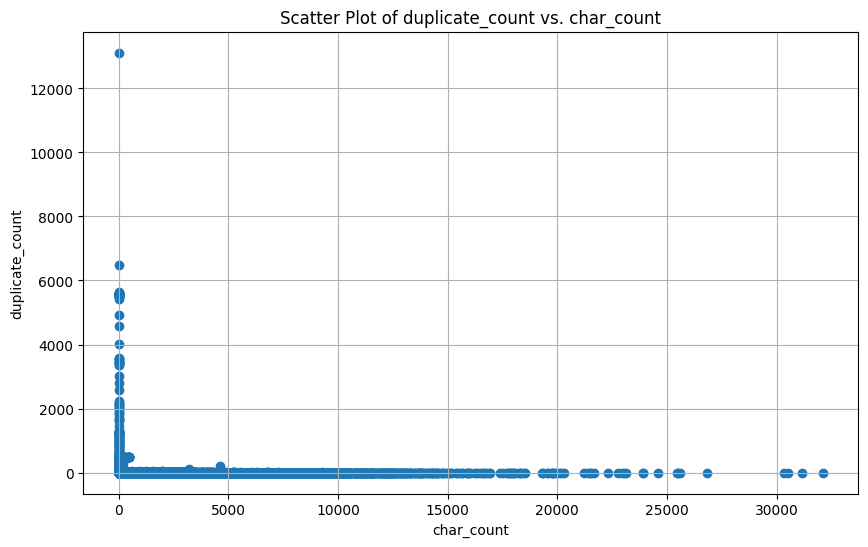

In [122]:
def create_scatter_plot(df, x_column, y_column):
    """
    Creates a scatter plot of two columns from a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        x_column (str): The name of the column to use on the x-axis.
        y_column (str): The name of the column to use on the y-axis.
    """

    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    plt.scatter(df[x_column], df[y_column])  # Alpha for transparency

    # Add labels and title
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"Scatter Plot of {y_column} vs. {x_column}")

    # Show the plot
    plt.grid(True)
    plt.show()

create_scatter_plot(processed_df, "char_count", "duplicate_count")

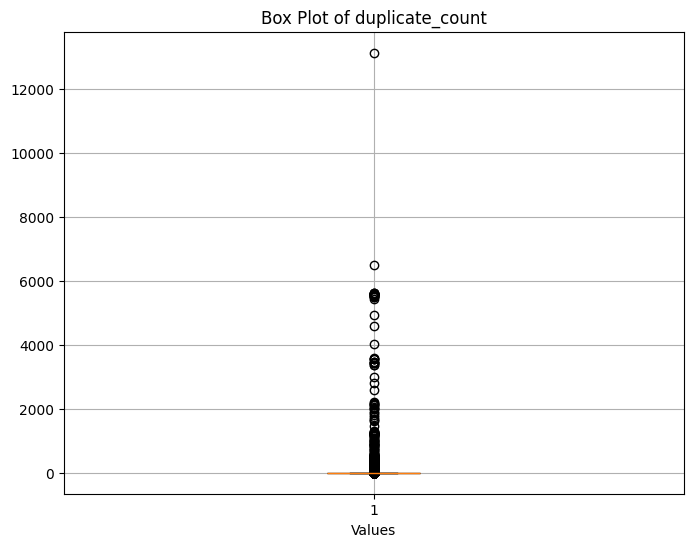

In [121]:
def create_box_plot(data, column_name, color):
  """
  Creates a vertical box plot with a specified color.

  Args:
    data: DataFrame containing the data.
    column_name: Name of the column to plot.
    color: Color of the box plot.
  """
  plt.figure(figsize=(8, 6))
  plt.boxplot(data[column_name], patch_artist=True,
              boxprops=dict(facecolor=color))
  plt.xlabel("Values")
  plt.title(f"Box Plot of {column_name}")
  plt.grid(True)
  plt.show()

create_box_plot(processed_df, "duplicate_count", "coral")

#### Splitting data

In [6]:
def split_dataframe(csv_file, test_size=0.2, random_state=42, stratify=None):
    """
    Splits a CSV file into train and test sets and returns them as dataframes.

    Args:
        csv_file (str): Path to the input CSV file.
        test_size (float): Proportion of the dataset to include in the test split (default: 0.2).
        random_state (int): Seed for random number generator for reproducibility (default: 42).
        stratify (pandas.Series): Column to use for stratified splitting (default: None).

    Returns:
        train_df (pandas.DataFrame): Training dataset.
        test_df (pandas.DataFrame): Testing dataset.
    """
    try:
        # Load the CSV file into a dataframe
        df = pd.read_csv(csv_file)
        
        # Drop the "Unnamed: 0" column if it exists
        if "Unnamed: 0" in df.columns:
            df.drop("Unnamed: 0", axis=1, inplace=True)

        # Separate features (X) and target (y)
        X = df.iloc[:, :-1]  # All columns except the last one
        y = df.iloc[:, -1]   # Last column as the target

        # Perform the train-test split
        if stratify is not None:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, random_state=random_state, stratify=y
            )
        else:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, random_state=random_state
            )

        # Combine features and target back into dataframes
        train_df = pd.concat([X_train, y_train], axis=1)
        test_df = pd.concat([X_test, y_test], axis=1)

        # Return the train and test dataframes
        return train_df, test_df

    except FileNotFoundError:
        print(f"Error: CSV file '{csv_file}' not found.")
        return None, None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

train_df, test_df = split_dataframe("2.5m-reviews-dataset.csv", test_size=0.2, random_state=42)
if train_df is not None and test_df is not None:
    print("Train DataFrame:")
    print(train_df.head())
    print("\nTest DataFrame:")
    print(test_df.head())

Train DataFrame:
        review_topic                                             review  score
1665889         Food  This noodle is simply delicious.  I used to us...    5.0
209078        Course  Excellent designed for new to Data Science . V...    5.0
2133794         Food  Most recipes I've been using lately request ha...    5.0
160458        Course     What an absolutely informative learning point     5.0
496981        Course  This was a very tasking yet interesting course...    4.0

Test DataFrame:
        review_topic                                             review  score
1380792       Course                                       Excelente!!!    5.0
1282429       Course        Informative, well done. Absolutely helpful.    5.0
782027        Course  I love this course, it´s great!!!!  Thanks pro...    5.0
242071        Course  Excellent way of presenting the information!!!...    5.0
612558        Course  Good introduction into the topic, well explain...    5.0


In [9]:
train_df.nunique()

review_topic         5
review          888996
score               10
dtype: int64

In [19]:
train_df["score"].value_counts(sort=True)

score
5.0    1413266
4.0     307504
3.0      97436
1.0      84399
2.0      45596
4.5      14309
3.5       5633
2.5       1752
1.5        509
0.5        331
Name: count, dtype: int64

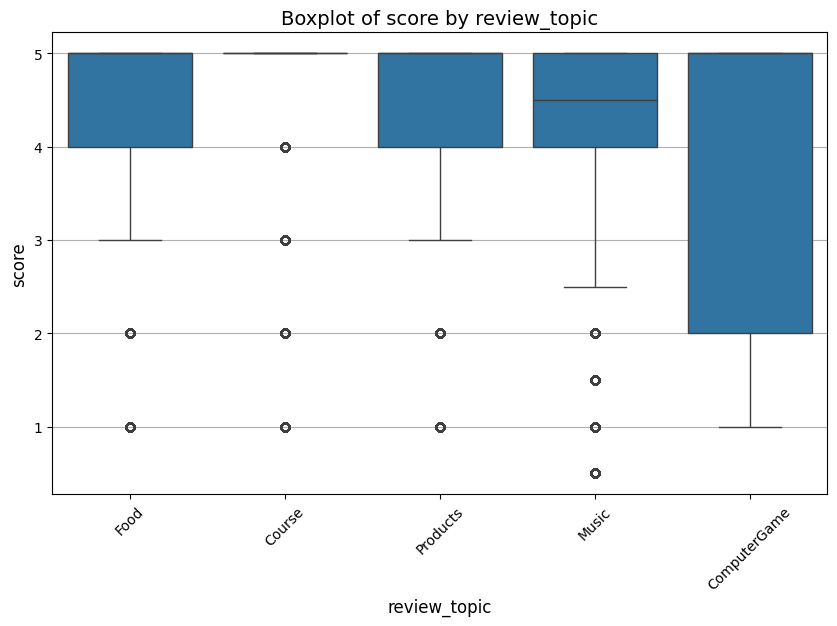

In [8]:
def plot_boxplot_by_topic(df, score_column, topic_column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[topic_column], y=df[score_column])
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.title(f'Boxplot of {score_column} by {topic_column}', fontsize=14)
    plt.xlabel(topic_column, fontsize=12)
    plt.ylabel(score_column, fontsize=12)
    plt.grid(axis='y')
    plt.show()

plot_boxplot_by_topic(train_df, 'score', 'review_topic')